In [22]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __add__(self,other):
        return Point(self.x+other.x,self.y+other.y)

    def __sub__(self,other):
        return Point(self.x-other.x,self.y-other.y)

    # cross-product
    def __mul__(self,other):
        return self.x*other.y - self.y*other.x

    def __lt__(self,other):
        return (self.x,self.y)<(other.x,other.y)

    def triangle(self,b,c):
        # return >0 kalo self,b,c anticlockwise
        # return 0 kalo self,b,c, kolinear
        # return <0 kalo self,b,c clockwise
        return (b-self)*(c-self)
    
    def name(self):
        return "{} {}".format(self.x,self.y)

def DivideNConquer(points):
    # I.S: points sudah sorted
    # mengembalikan titik convex hull berurut anticlockwise
    if(len(points)<=3):
        # tahap conquer
        if(len(points)==2):
            return points
        elif(len(points)==3):
            a,b,c = points
            if(a.triangle(b,c)>=0):
                return [a,b,c]
            else:
                return [a,c,b]
    else:
        n = len(points)
        leftHull = DivideNConquer(points[:(n//2)])
        rightHull = DivideNConquer(points[(n//2):])
        # tahap combine
        hull = []
        nl = len(leftHull)
        nr = len(rightHull)

        kl = leftHull.index(max(leftHull))
        kr = rightHull.index(min(rightHull))
        # find upper tangent
        ul = kl
        ur = kr
        found = False
        while(not found):
            found = True
            # cek titik di kanan sudah paling atas
            while(leftHull[ul].triangle(rightHull[ur],rightHull[(ur-1+nr)%nr])>0):
                ur = (ur-1+nr)%nr
            # cek titik di kiri sudah paling atas
            while(rightHull[ur].triangle(leftHull[ul],leftHull[(ul+1)%nl])<0):
                ul = (ul+1)%nl
                found = False

        # find lower tangent
        ll = kl
        lr = kr
        found = False
        while(not found):
            found = True
            while(leftHull[ll].triangle(rightHull[lr],rightHull[(lr+1)%nr])<0):
                lr = (lr+1)%nr
            while(rightHull[lr].triangle(leftHull[ll],leftHull[(ll-1+nl)%nl])>0):
                ll = (ll-1+nl)%nl
                found = False
        if(ul==ll and ur==lr):
            # kasus 1 garis
            hull.append(min(leftHull))
            hull.append(max(rightHull))
            return hull
        else:
            i = ul
            while(i!=ll):
                hull.append(leftHull[i])
                i = (i+1)%nl
            hull.append(leftHull[i])
            i = lr
            while(i!=ur):
                hull.append(rightHull[i])
                i = (i+1)%nr
            hull.append(rightHull[i])

            return hull

def myConvexHull(bucket):
    points = [Point(row[0],row[1]) for row in bucket]
    points.sort()
    unique_points = []
    # mengeliminasi titik yang sama
    for i in range(len(points)):
        if(not(i>0 and (points[i].x-points[i-1].x<1e-6 and points[i].y-points[i-1].y<1e-6))):
            unique_points.append(points[i])
    hull = DivideNConquer(unique_points)
    # mengembalikan list
    listHull = [[point.x,point.y] for point in hull]
    listHull.append(listHull[0])
    return listHull

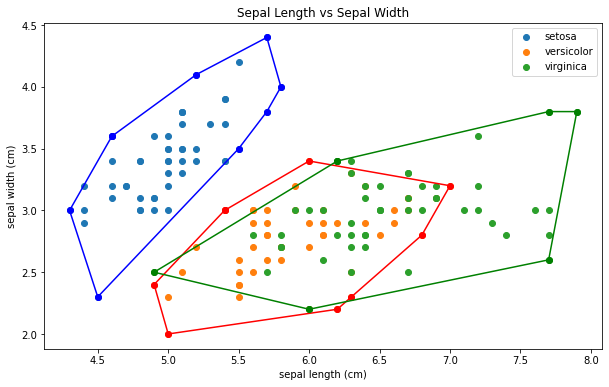

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets

data = datasets.load_iris() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Length vs Sepal Width')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket) #bagian ini diganti dengan hasil implementasi
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    hull = pd.DataFrame(hull)
    plt.plot(hull[0].values, hull[1].values, color=colors[i], marker='o')
plt.legend()
plt.show()

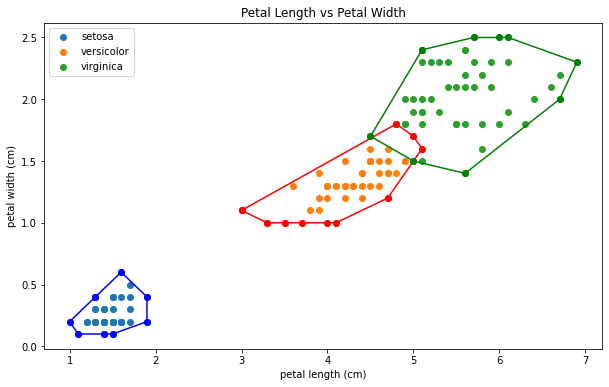

In [24]:
data = datasets.load_iris() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Length vs Petal Width')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket) #bagian ini diganti dengan hasil implementasi
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    hull = pd.DataFrame(hull)
    plt.plot(hull[0].values, hull[1].values, color=colors[i], marker='o')
plt.legend()
plt.show()